<a href="https://colab.research.google.com/github/snr1229/Learning_AI/blob/main/05%EC%8B%A4%EC%8A%B5_201811140_%EA%B0%95%EC%9D%80%EC%98%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 05 실습 CNN

201811140 강은영

Python 3

Google Colab 사용 / GPU가속

 *(Colab에서는 python2를 지원하지 않아서 3 사용했습니다.)

[GitHub url]
https://github.com/snr1229/Learning_AI

Load packages

In [27]:
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

MNIST train, test dataset 가져오기

In [28]:
mnist_train=dset.MNIST("",train=True,transform=transforms.ToTensor(),
                       target_transform=None, download=True)
mnist_test=dset.MNIST("",train=False,transform=transforms.ToTensor(),
                       target_transform=None, download=True)

대략적인 데이터 형태 파악

mnist_train length : 60000
mnist_test length : 10000
imgae data shape:  torch.Size([1, 28, 28])
label :  5


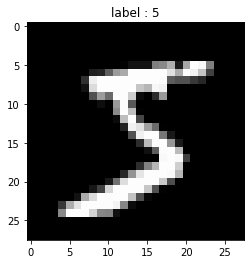

In [29]:
print ("mnist_train length :", len(mnist_train))
print ("mnist_test length :", len(mnist_test))

#데이터 하나 형태 파악
image, label = mnist_train.__getitem__(0)
print ("imgae data shape: ", image.size())
print ("label : ", label)

#데이터 직접 그려보기
img = image.numpy()
plt.title("label : %d" %label)
plt.imshow(img[0], cmap='gray')
plt.show()

MNIST data 띄워보기

5
torch.Size([1, 28, 28])
5


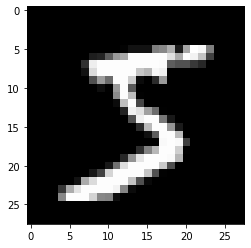

0


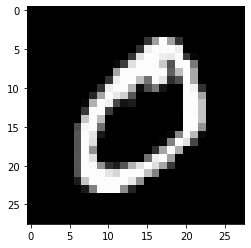

4


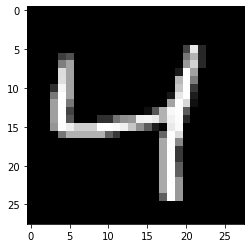

In [30]:
print(mnist_train[0][1])
print(mnist_train[0][0].size())

for i in range(3):
    img=mnist_train[i][0].numpy()
    print(mnist_train[i][1])
    plt.imshow(img[0],cmap='gray')
    plt.show()

convolution 하나 씌워보기

torch.Size([1, 1, 28, 28])
5
torch.Size([1, 3, 28, 28])


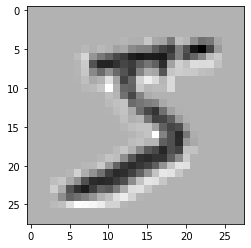

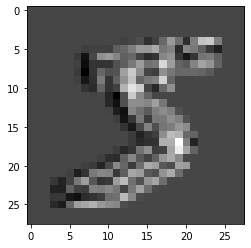

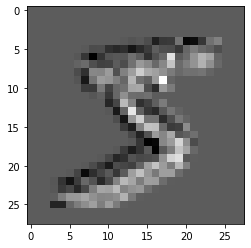

In [31]:
#mnist의 첫번째 이미지, 라벨 가져오기
image, label = mnist_train[0]
"""
view : tensor의 사이즈 조절.
[1,28,28] -> [1,1,28,28] : 추가된 제일 앞 1은 batch_size를 뜻한다.
"""
image=image.view(-1, image.size()[0], image.size()[1], image.size()[2])
print(image.size())

print(label)

"""
convolutional filter 정의
input이 흑백이여서 in_chaaneels = 1
"""
conv_layer=nn.Conv2d(in_channels=1,out_channels=3,kernel_size=3,padding=1)
#image에 적용 ==> 이것이 feature map이 된다.
output=conv_layer(Variable(image))
print(output.size())

for i in range(3):
    plt.imshow(output[0,i,:,:].data.numpy(), cmap='gray')
    plt.show()

## CNN 만들기

train, test data 가져오기

In [32]:
import numpy as np
import torch.optim as optim

batch_size = 16
learning_rate = 0.0002
num_epoch = 10

In [33]:
train_loader = torch.utils.data.DataLoader(list(mnist_train)[:batch_size*100], batch_size=batch_size,
                                           shuffle=True, num_workers=2,
                                           drop_last=True)
test_loader = torch.utils.data.DataLoader((mnist_test), batch_size=batch_size,
                                          shuffle=False, num_workers=2,
                                          drop_last=True)

CNN 클래스 만들기 (모델 만들기)

In [39]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer=nn.Sequential(
            nn.Conv2d(1, 16, 5, padding=2),
            nn.ReLU(),

            nn.Conv2d(16, 32, 5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Conv2d(32, 64, 5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(2,2)
        )
        self.fc_layer=nn.Sequential(
            nn.Linear(64*7*7, 100),
            nn.ReLU(),
            nn.Linear(100,10)
        )

    def forward(self, x):
       out = self.layer(x)
       out = out.view(batch_size, -1)
       out = self.fc_layer(out)
       return out

model = CNN().cuda()

In [40]:
#Check parameters
for parameter in model.parameters():
    print(parameter.shape)

torch.Size([16, 1, 5, 5])
torch.Size([16])
torch.Size([32, 16, 5, 5])
torch.Size([32])
torch.Size([64, 32, 5, 5])
torch.Size([64])
torch.Size([100, 3136])
torch.Size([100])
torch.Size([10, 100])
torch.Size([10])


In [41]:
#loss function, optimizer 선언
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

Optimization

In [44]:
for i in range(num_epoch):
    for j, [image, label] in enumerate(train_loader):
        x = Variable(image).cuda()
        y_ = Variable(label).cuda()

        optimizer.zero_grad()
        output=model.forward(x)
        loss = loss_func(output, y_)
        loss.backward() #gradient 계산
        optimizer.step()

        if j%50==0:
            print(loss,j,i)


tensor(2.3057, device='cuda:0', grad_fn=<NllLossBackward>) 0 0
tensor(2.1396, device='cuda:0', grad_fn=<NllLossBackward>) 50 0
tensor(0.7844, device='cuda:0', grad_fn=<NllLossBackward>) 0 1
tensor(0.4487, device='cuda:0', grad_fn=<NllLossBackward>) 50 1
tensor(0.3017, device='cuda:0', grad_fn=<NllLossBackward>) 0 2
tensor(0.1467, device='cuda:0', grad_fn=<NllLossBackward>) 50 2
tensor(0.3928, device='cuda:0', grad_fn=<NllLossBackward>) 0 3
tensor(0.0715, device='cuda:0', grad_fn=<NllLossBackward>) 50 3
tensor(0.0244, device='cuda:0', grad_fn=<NllLossBackward>) 0 4
tensor(0.3096, device='cuda:0', grad_fn=<NllLossBackward>) 50 4
tensor(0.3206, device='cuda:0', grad_fn=<NllLossBackward>) 0 5
tensor(0.4611, device='cuda:0', grad_fn=<NllLossBackward>) 50 5
tensor(0.1973, device='cuda:0', grad_fn=<NllLossBackward>) 0 6
tensor(0.0865, device='cuda:0', grad_fn=<NllLossBackward>) 50 6
tensor(0.0401, device='cuda:0', grad_fn=<NllLossBackward>) 0 7
tensor(0.3761, device='cuda:0', grad_fn=<NllLoss

In [51]:
#모델 저장시키기
torch.save(model, 'mycnn_model_%d.pkl'%num_epoch)

In [52]:
try :
    model==torch.load('mycnn_model_10.pkl')
    print("model restored")
except :
    print("model not resotred")

model restored


In [48]:
def ComputeAccr(dloader, imodel):
    correct = 0
    total =0

    for j, [imgs, labels] in enumerate(dloader):
        img = Variable(imgs).cuda()
        label = Variable(labels).cuda()

        output = imodel.forward(img)
        _, output_index = torch.max(output, 1)

        total += label.size(0)
        correct += (output_index == label).sum().float()
    print("Accuracy of Test Data : {}".format(100*correct/total))

In [49]:
ComputeAccr(test_loader, model)

Accuracy of Test Data : 95.08999633789062
